<a href="https://colab.research.google.com/github/SahilGolait/Bike-Sharing-Demand-Prediction-new/blob/main/New_Bike_Sharing_Demand_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**  Sahil Rahul Golait


# **Project Summary -**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [45]:
#Importing the Dependencies
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information

In [6]:

# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [8]:

# Missing Values/Null Values Count
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

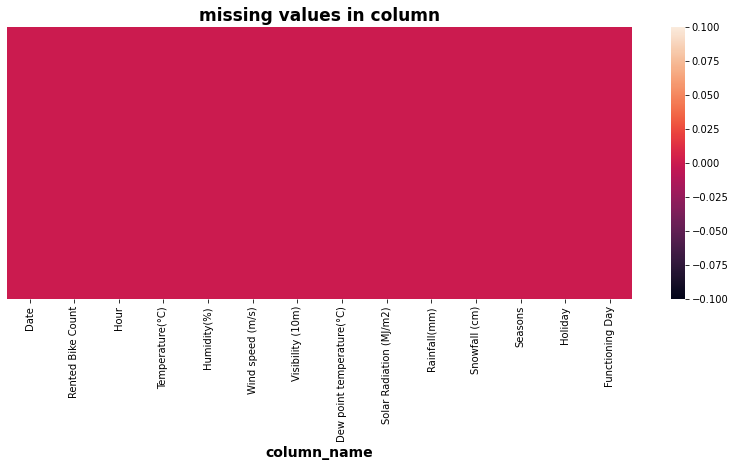

In [9]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(dataset.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

Answer Here :- Data set contain 8760 rows and 14 columns respectively. Their is no missing values in this dataset. Their is no duplicate values in this dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
dataset["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [13]:
dataset["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [14]:
dataset["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
dataset["Rainfall(mm)"].unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        6.4,  9.5,  3.5,  0.9,  3.3,  1.4,  1.5,  3.7,  4.5,  9. ,  2. ,
        8. , 17. ,  7. ,  3. ,  1.9,  0.8,  4. ,  6. ,  5. ,  5.5,  2.4,
       35. , 19. , 13.5, 10. , 12.5, 11.5,  5.4, 10.5,  6.5, 16. , 14.5,
        4.9, 21.5, 12. , 18.5,  7.5, 24. ,  8.5,  7.3,  1.3, 15.5, 29.5,
       21. , 13. ,  1.2, 18. ,  9.1,  1.8])

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
# convert the "date" column into 3 different columns i.e "year","month","day"

dataset['Date']= pd.to_datetime(dataset['Date'])

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [18]:
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [20]:
dataset['year'] = dataset['Date'].dt.year

dataset['month'] = dataset['Date'].dt.month

dataset['day'] = dataset['Date'].dt.day_name()



In [21]:
#creating a new column of "weekdays_weekend" 
dataset['week']=dataset['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

# checking no of years
dataset['week'].value_counts()

weekday    6216
weekend    2544
Name: week, dtype: int64

In [22]:
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  year  month       day     week  
0             Yes  2017      1  Thursday  weekday  
1             Yes  2017      1  Thursday  weekday  
2             Yes  2017      1  Thursday  weekday  
3             Yes  2017      1  Thursday  weekday  
4             Yes  2017      1  Thursday  weekday

In [23]:
# drop the column "Date","day","year"

dataset=dataset.drop(columns=['Date','day','year'],axis=1)


In [24]:
dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

      week  
0  weekday  
1  weekday  
2  weekday  
3  weekday  
4  weekday

In [25]:
#Change the int64 column into catagory column
cols=['Hour','month','week']
for col in cols:
  dataset[col]=dataset[col].astype('object')

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec



### What all manipulations have you done and insights you found?

Answer Here :- So we convert the "date" column into 3 different column i.e "year","month","day". The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column. and finally we convert the 'Hour','month','week' column integer datatype into category datatype. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

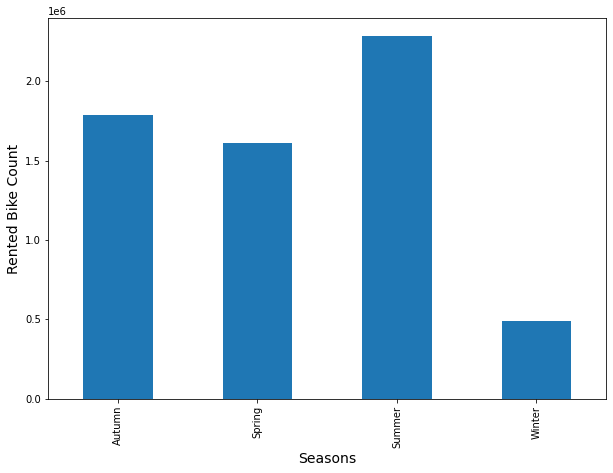

In [27]:
#Creating a visualisation for the seasons column

plt.figure(figsize=(10,7))
dataset.groupby(['Seasons']).sum()['Rented Bike Count'].plot(kind='bar')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- From the above bar plot it is clear that in summer season Rented bike count is very high and in Winter season Rented bike count is very low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- winter is coldest season of the year thats why customers prefer taxi or cars over the rented bike thats why winter season is negative growth.

#### Chart - 2

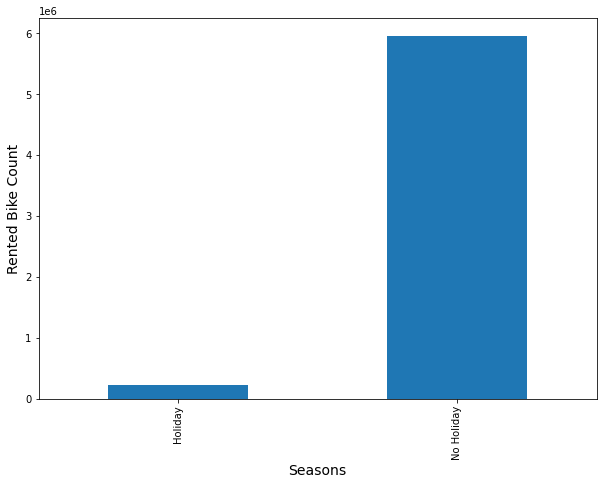

In [28]:
# Chart - 2 visualization code
#Creating a visualisation for the Holiday column

plt.figure(figsize=(10,7))
dataset.groupby(['Holiday']).sum()['Rented Bike Count'].plot(kind='bar')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- As we can see that the majority of the bikes rented are on days which are considered as No Holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- Positive growth is clearly seen in the no holiday days because on no holiday days office or work is going on where on holiday days negative growth is occur because on holiday days office or work is shut down.

#### Chart - 3

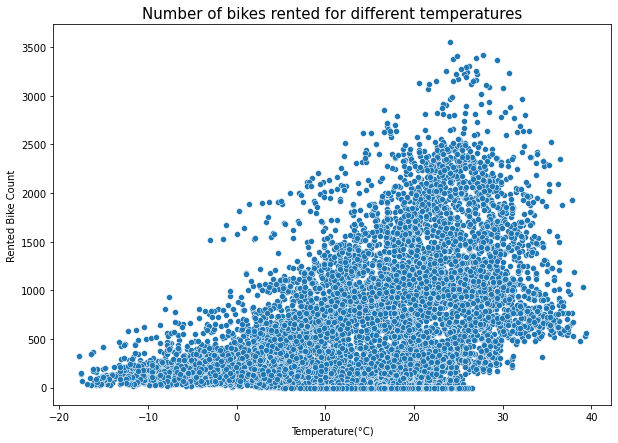

In [29]:
# Chart - 3 visualization code
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.scatterplot(data=dataset,x='Temperature(°C)',y='Rented Bike Count')
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here :-A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- As we can see that the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-When the temperature ranges from 15 to 30 Rented bikes have positive growth and other temperature have less growth.

#### Chart - 4

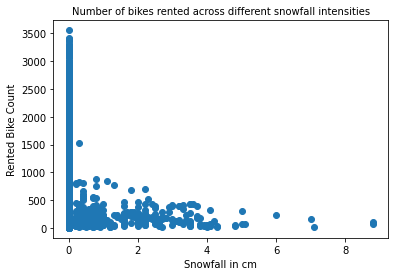

In [30]:
# Chart - 4 visualization code
#Creating a visualisation for different snowfall intensities
plt.scatter(data=dataset,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different snowfall intensities',size=10)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-We can see that most of the bikes are rented when there is no snowfall .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- no snowfall gives the positive impact o rented bike where the medium and high snowfall gives the negative impact on rented bike that means when there is snow fall very less bike was rented or no bike was rented.

#### Chart - 5

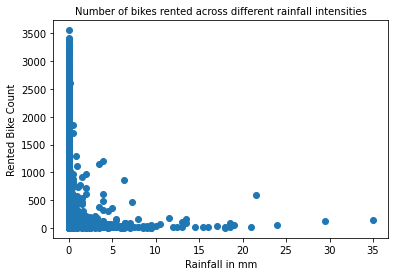

In [31]:
# Chart - 5 visualization code
#Creating a visualisation for different rainfall intensities
plt.scatter(data=dataset,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different rainfall intensities',size=10)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here :- A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- We can see that most of the bikes are rented when there is no rainfall .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- no rainfall gives the positive impact o rented bike where the medium and high rainfall gives the negative impact on rented bike that means when there is rainfall very less bike was rented or no bike was rented.

#### Chart - 6

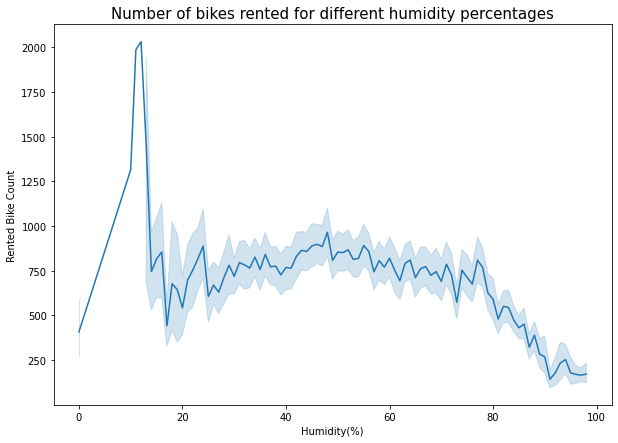

In [32]:
plt.figure(figsize=(10,7))
sns.lineplot(data=dataset,x='Humidity(%)',y='Rented Bike Count')
plt.title('Number of bikes rented for different humidity percentages',size=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here :-Lineplot are used to express a relationship between two variables of contineous data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- As we can see that the majority of the bikes are rented for a humidity percentage range of 30 to 70.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- 30 to 70 range of humidity is positive growth other values of humidity gets negative growth.

#### Chart - 7

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

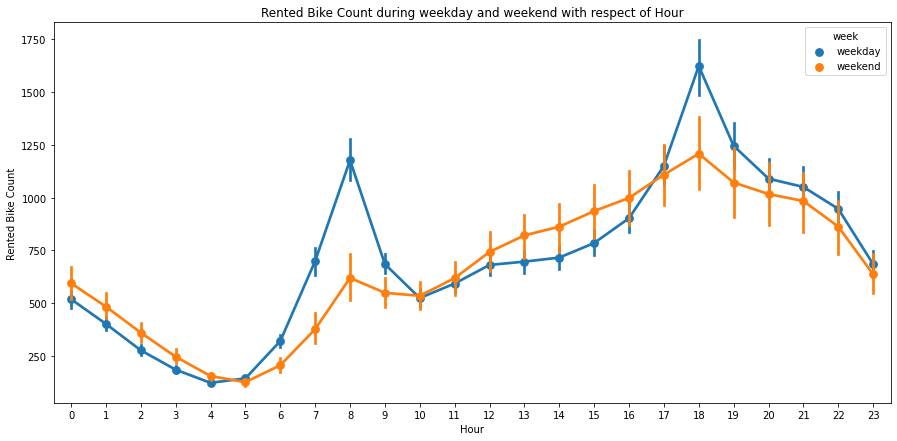

In [33]:
# Chart - 7 visualization code
#Creating a visualisation for different hours of the day
plt.figure(figsize=(15,7))
sns.pointplot(x=dataset["Hour"],y=dataset['Rented Bike Count'],hue=dataset['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

##### 1. Why did you pick the specific chart?

Answer Here :- A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- Here we can see that on weekday and weekend days the highest number of bike rentals have been done in the 18th hour, i.e 6pm, and on weekends days lowest in the 4th hour, i.e 4am and on weekdays lowest in the 5th hour, i.e 5am.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

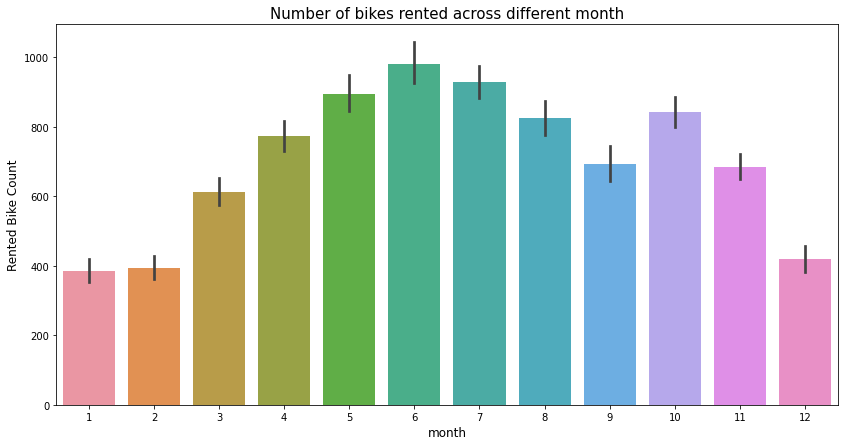

In [34]:
# Chart - 8 visualization code
#Creating a visualisation for different hours of the day
plt.figure(figsize=(14,7))
sns.barplot(data=dataset,x='month',y='Rented Bike Count')
plt.title('Number of bikes rented across different month',size=15)
plt.xlabel('month',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- from the above bar plot it is clearly see that 6th month rented the maximum bike where as 1st, 2nd and 12th month rented the minimum bikes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- in Summer season rented bike have positive growth and in winter season rented bikes have negative growth we can seen this in season barplot.

#### Chart - 9

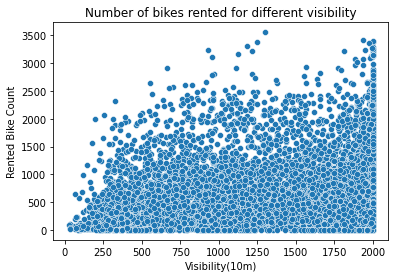

In [35]:
# Chart - 9 visualization code
#Creating a visualisation for number of bikes rented in different visibility ranges
sns.scatterplot(data=dataset,x='Visibility (10m)',y='Rented Bike Count')
plt.xlabel('Visibility(10m)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bikes rented for different visibility')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- We can see that higher visibility is preffered by the customers. Through further analysis of the visibility_bike dataframe we can see that for increasing visibility there is an increase in bikes rented.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here : lower visibility impact the negative growth on rented bikes sales.

#### Chart - 10

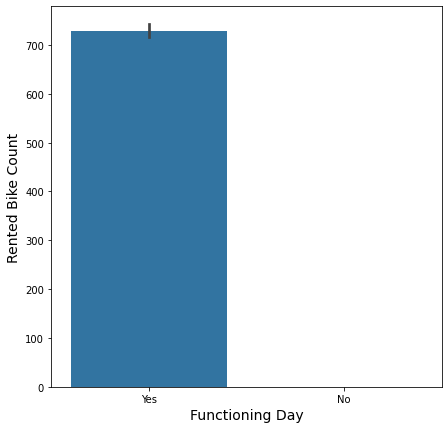

In [36]:
# Chart - 10 visualization code
#Creating a visualisation for the holidays dataframe

plt.figure(figsize=(7,7))
sns.barplot(data=dataset,x='Functioning Day',y='Rented Bike Count')

plt.xlabel("Functioning Day",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- it is clear from above plot rented bikes are rented on functioning day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- rented bikes have huge loss on no functioning day.

#### Chart - 11

In [37]:
dataset['week'].value_counts()

weekday    6216
weekend    2544
Name: week, dtype: int64

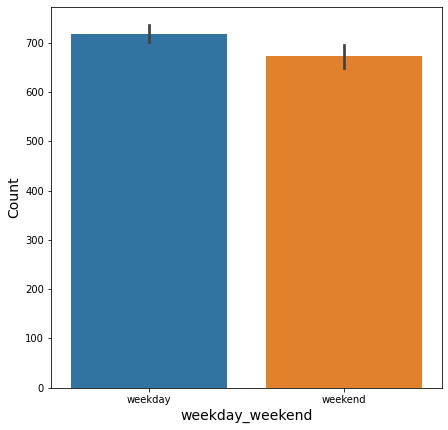

In [38]:
# Chart - 11 visualization code
#Creating a visualisation for the holidays dataframe

plt.figure(figsize=(7,7))
sns.barplot(data=dataset,x='week',y='Rented Bike Count')
plt.xlabel("weekday_weekend",size=14)
plt.ylabel("Count", size=14)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here :- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

from the barplot it is clear that rented bike count are almost same on weekdays and weekend days. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:- positive growth is for weekends days 

In [39]:
numeric_features= dataset.select_dtypes(exclude='object')
categorical_features=dataset.select_dtypes(include='object')

#### Chart - 12

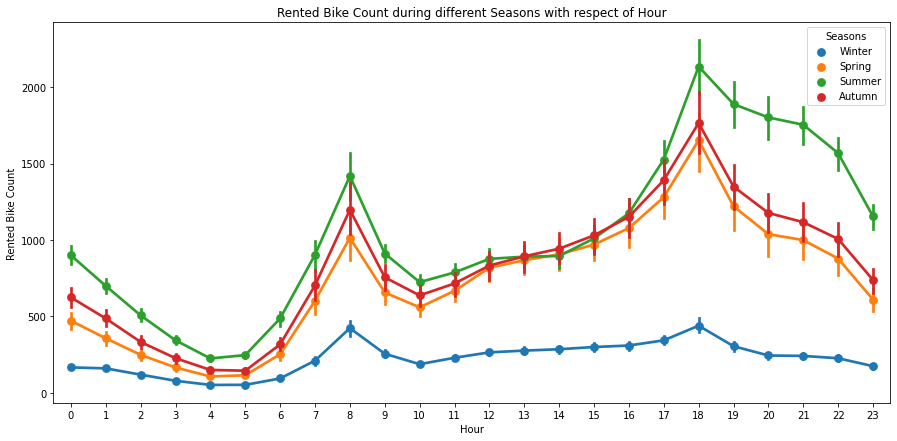

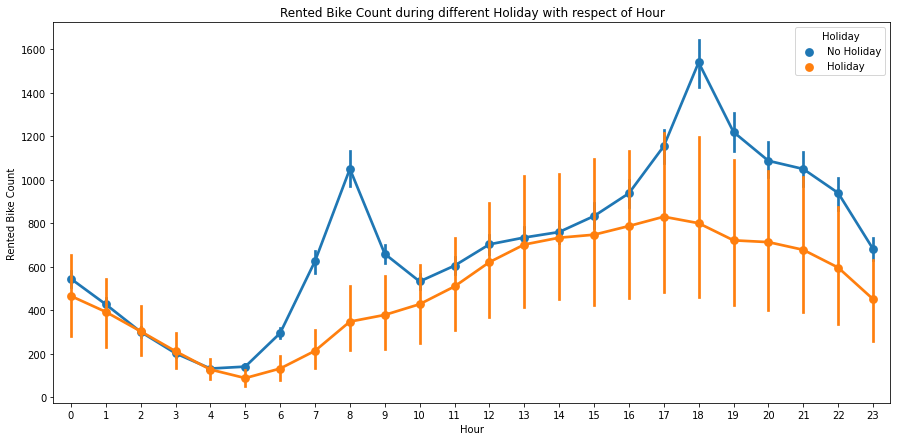

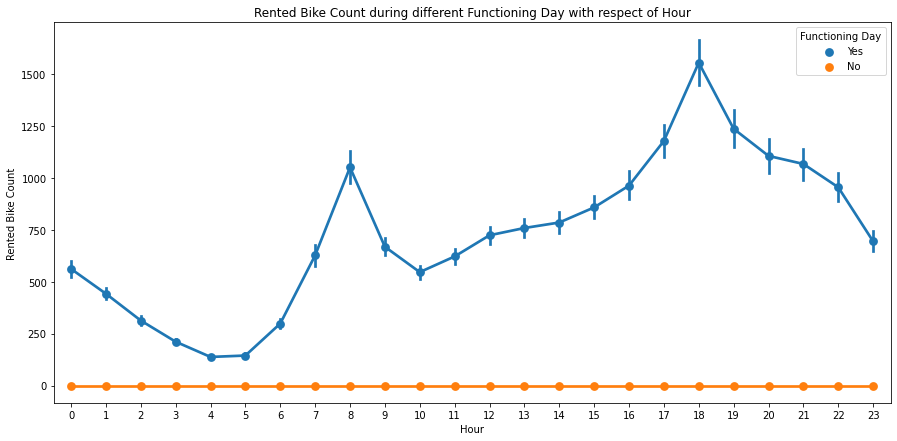

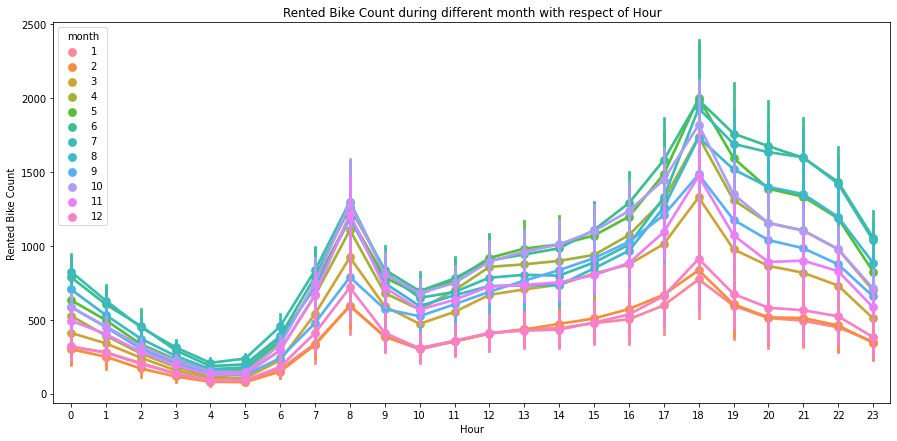

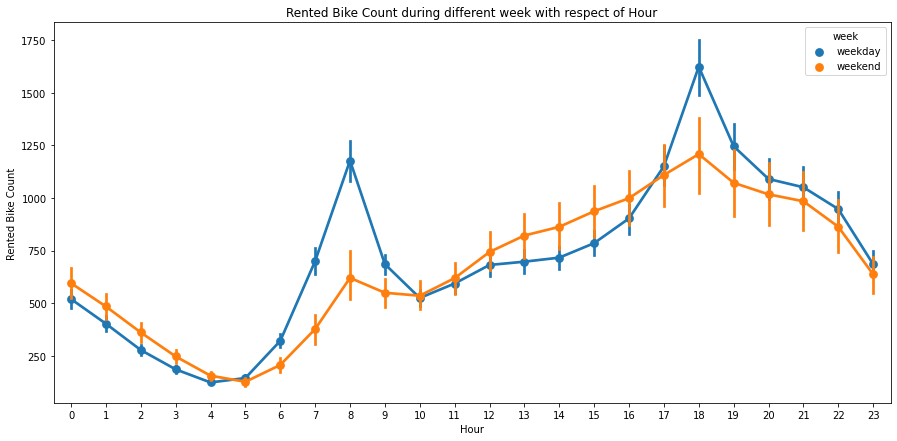

In [40]:
# Chart - 12 visualization code
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,7))
    sns.pointplot(x=dataset["Hour"],y=dataset['Rented Bike Count'],hue=dataset[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

Season :-
In the season column, we are able to understand that the demand is low in the winter season. and the demandis hight in summer.

Holiday :-
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

Functioning Day :-
In the Functioning Day column, If there is no Functioning Day then there is no demand

Days of week :-
In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays.

month :-
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

#### Chart - 13

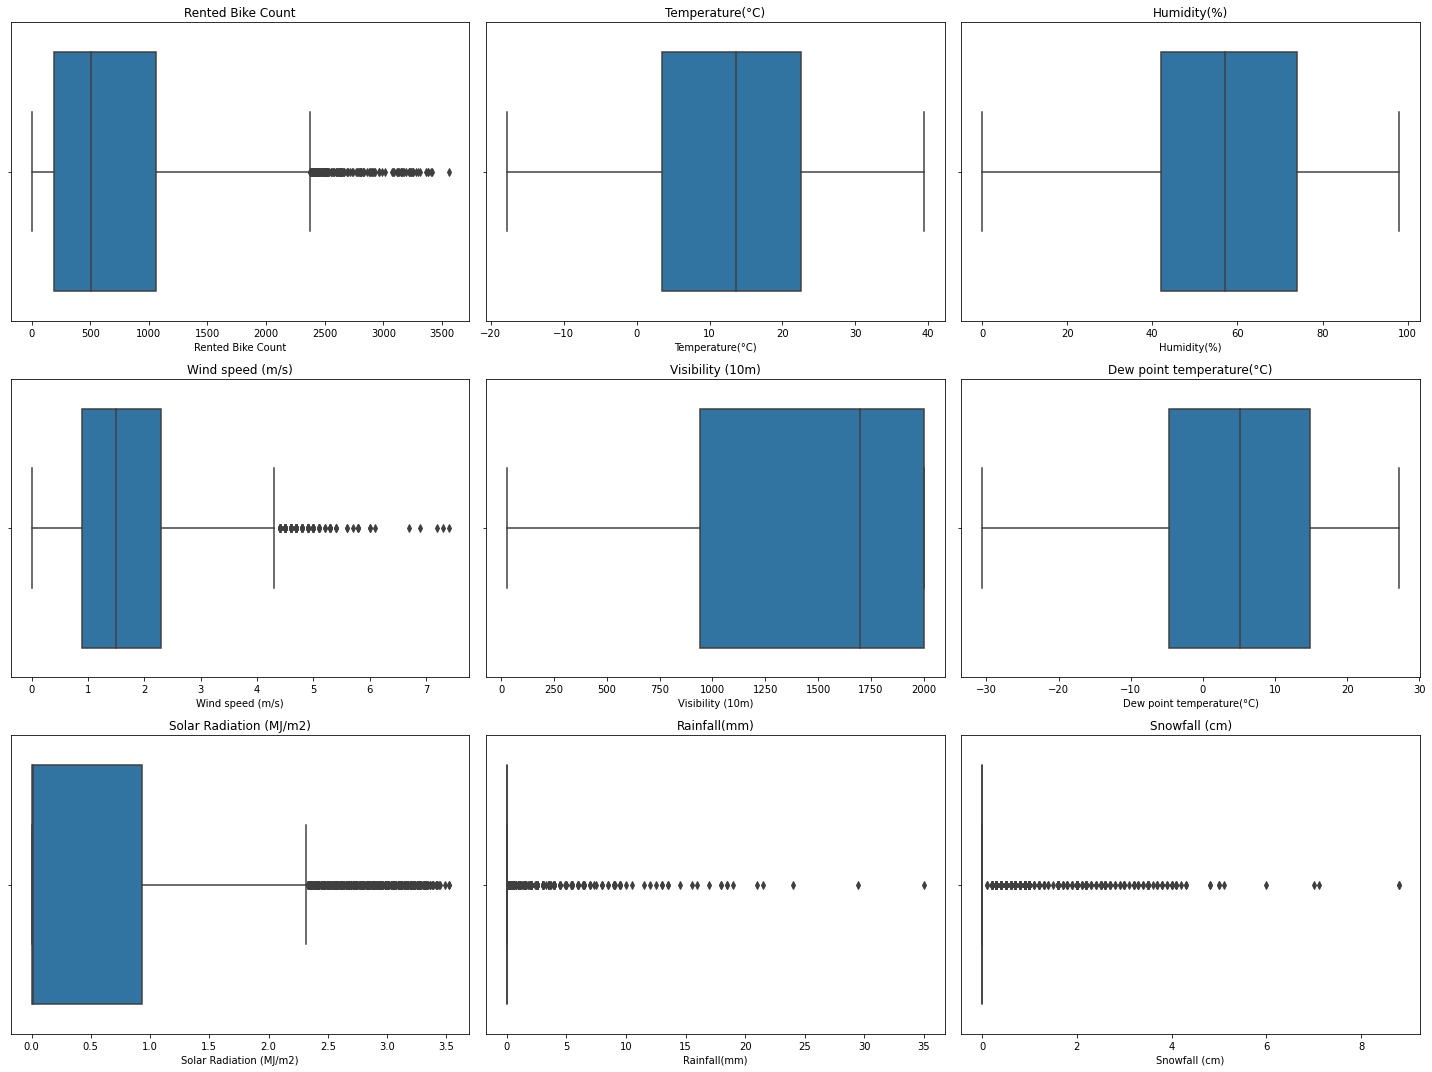

In [41]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(dataset[i])
  plt.title(i)
  plt.tight_layout()


##### 1. Why did you pick the specific chart?

Answer Here.  :- Boxplot is use to detect the outlier of the columns thats why we use box plot.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation. we can remove outlier in the future when we do feature engineering.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :-We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

#### Chart - 14

Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature.

Pays little attention to the skewness of our numerical features.

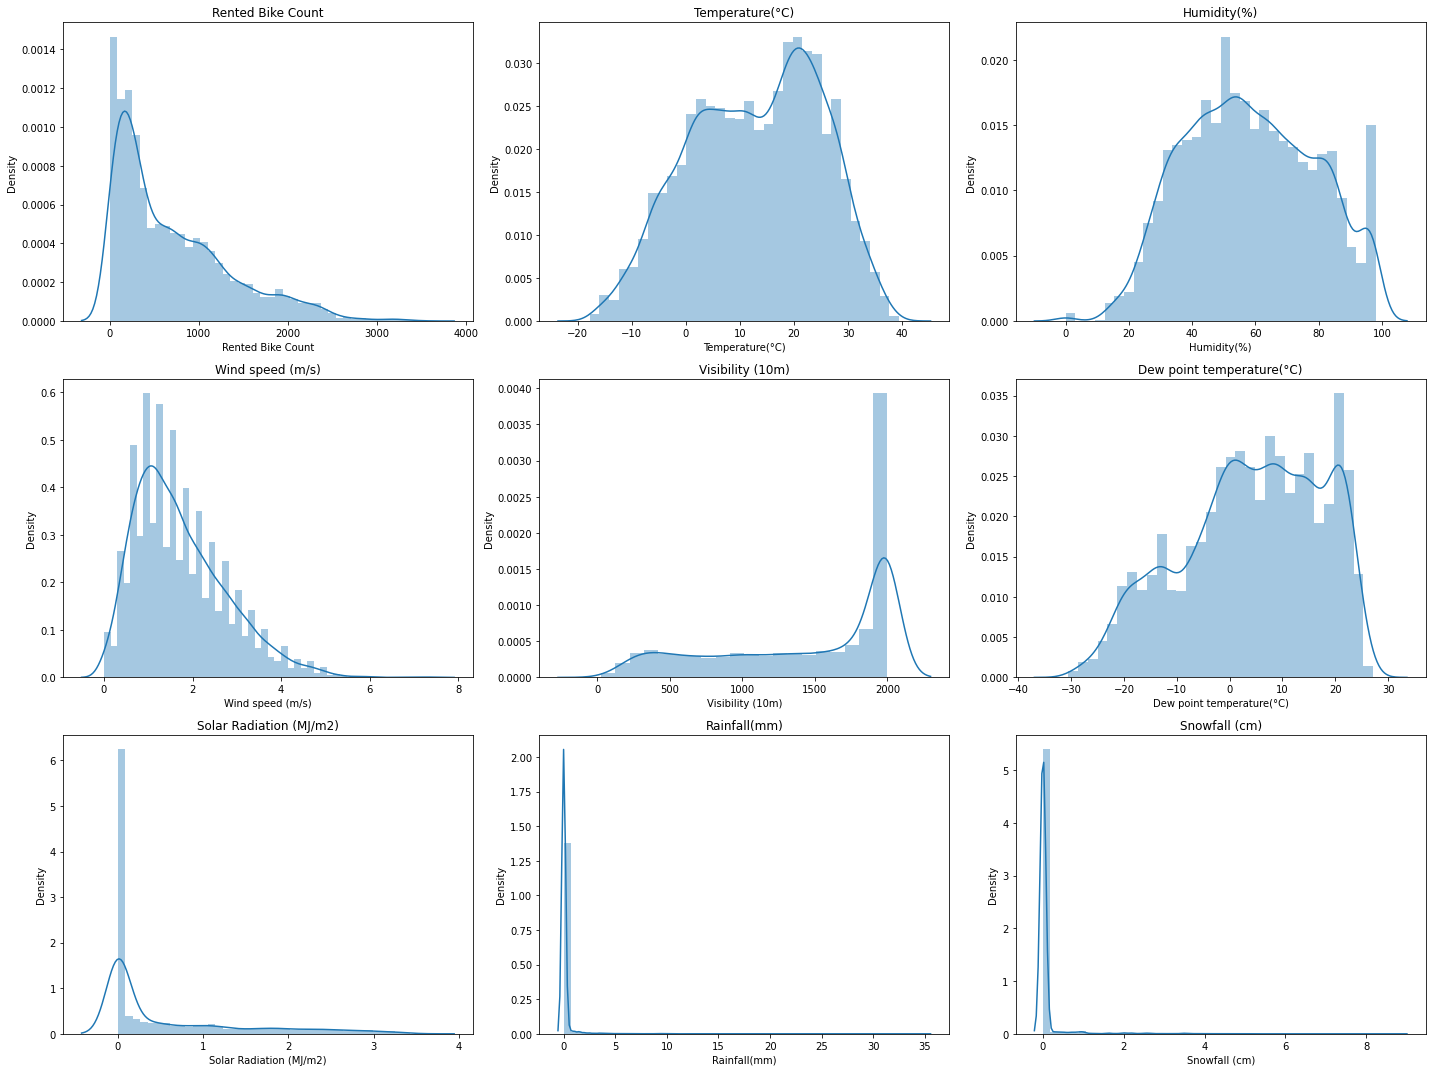

In [42]:
# Distrubution of Data
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(dataset[i])
  plt.title(i)
  plt.tight_layout()



##### 1. Why did you pick the specific chart?

Answer Here :- subplot is use to check the column skewness which meansthe column is right skewed or left skewed.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

Right skewed columns are :-
Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

Left skewed columns are :-
Visibility (10m), Dew point temperature(°C)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- right skewed and left skewed columns contains negative impact on our analysis.

#### Chart - 15

Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature.

Pays little attention to the skewness of our numerical features.

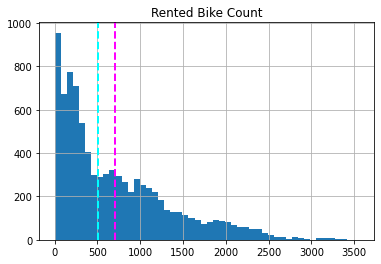

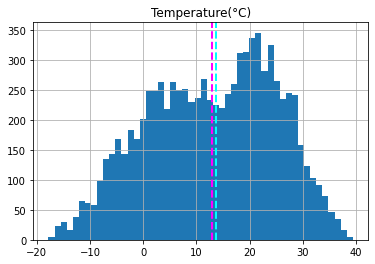

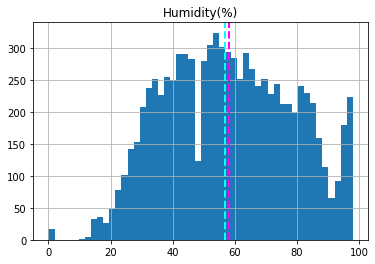

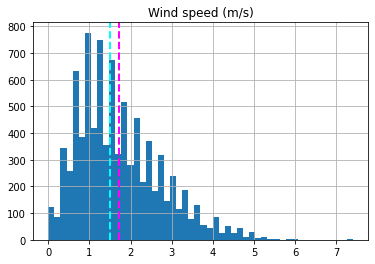

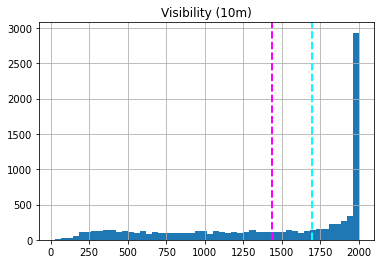

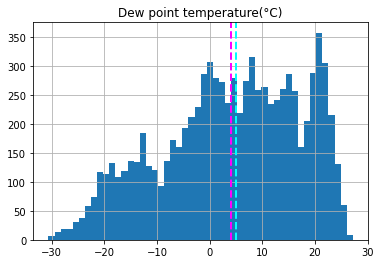

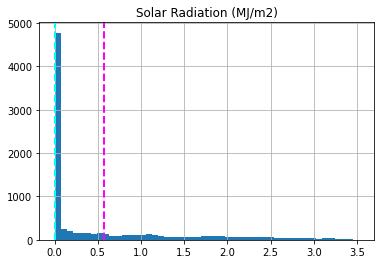

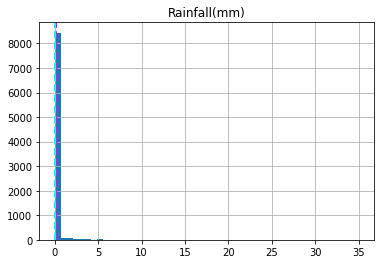

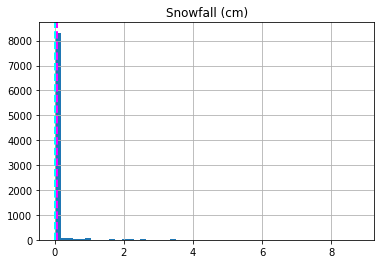

In [43]:
# Distrubution of Data
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=dataset[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)



##### 1. Why did you pick the specific chart?

Answer Here :- histrograms is best chart to visulised the mean and median thtas why we used histrogram.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- From this we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:- we can see that which of the column is skewed their mean and median is also skewed this gives the negative impact on our analysis. 

#### Chart - 16



Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature.

Pays little attention to the skewness of our numerical features.

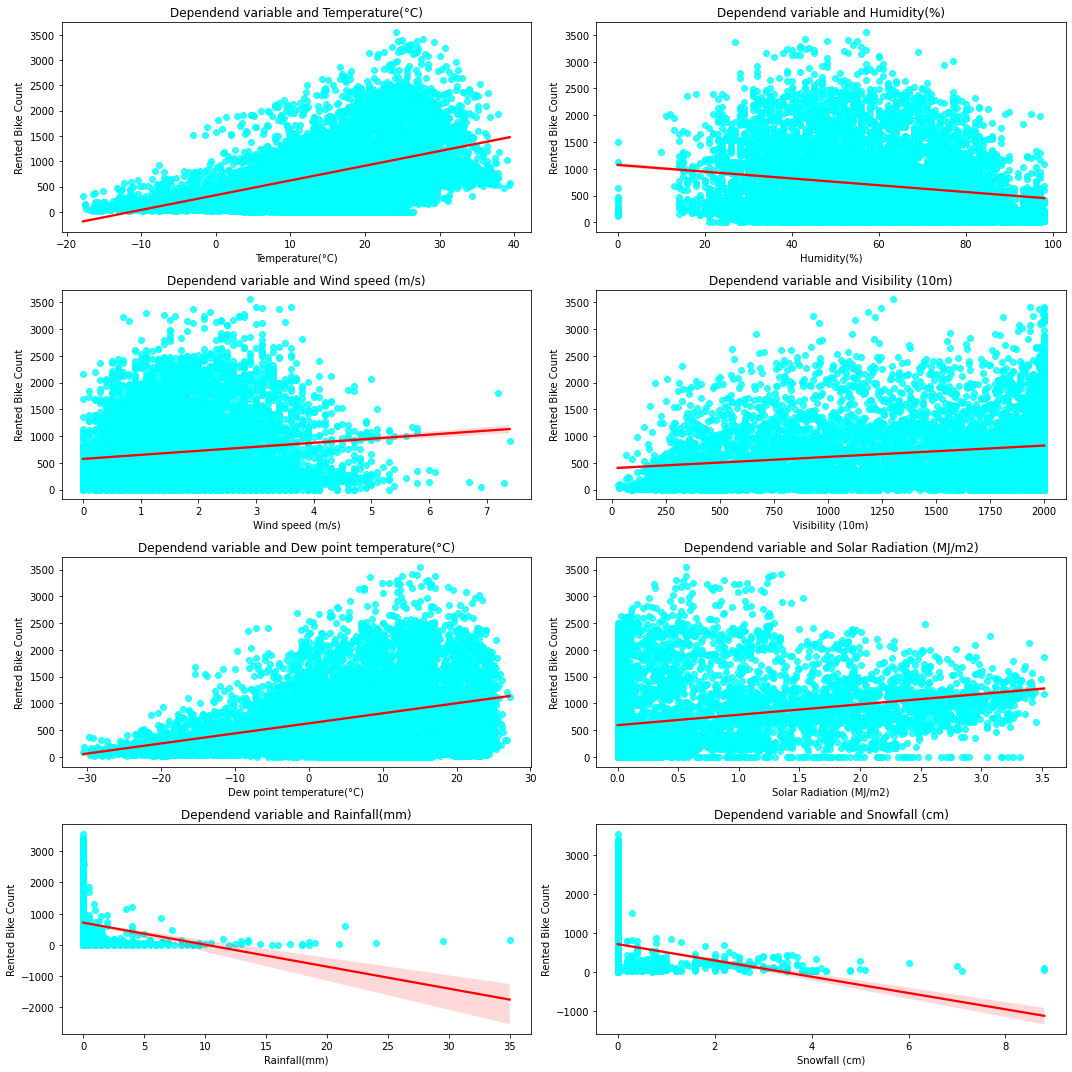

In [44]:
# Distrubution of Data
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(dataset[i], dataset['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()


##### 1. Why did you pick the specific chart?

Answer Here :- We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 16

Text(0.5, 1.0, 'Square root')

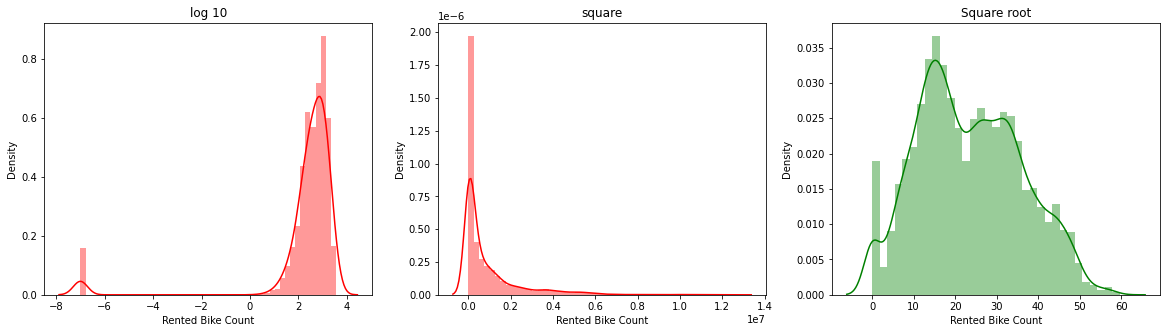

In [47]:
# Distrubution of Data
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(dataset['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((dataset['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(dataset['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")


##### 1. Why did you pick the specific chart?

Answer Here :-A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 17 - Correlation Heatmap

<AxesSubplot:>

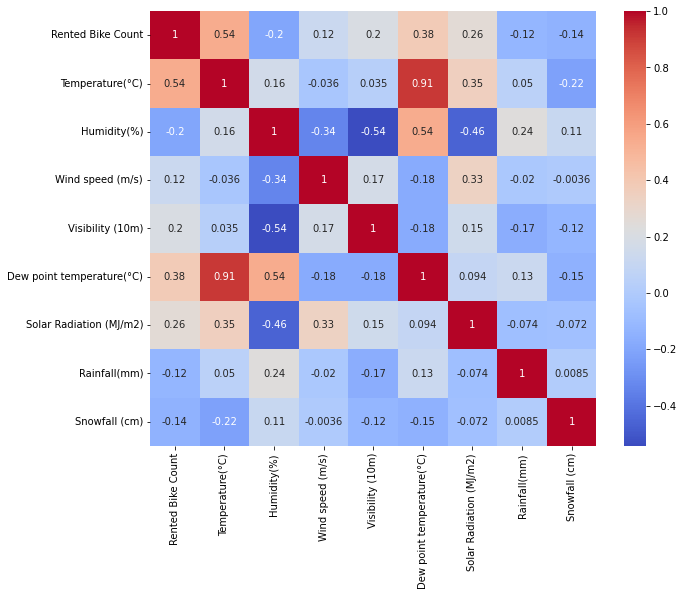

In [48]:
# Correlation Heatmap visualization code
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

Answer Here :- A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. Heat map gives the co-relation between the numerical data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- Dew point temperature column is highly correlated to the Temperature column .

Rented bike column is moderately co-related with temperature column.

Rented bike column is moderately co-related with Dew point temperature column.

Humidity is moderately co-related with Dew point temperature column.

#### Chart - 18 - Pair Plot 

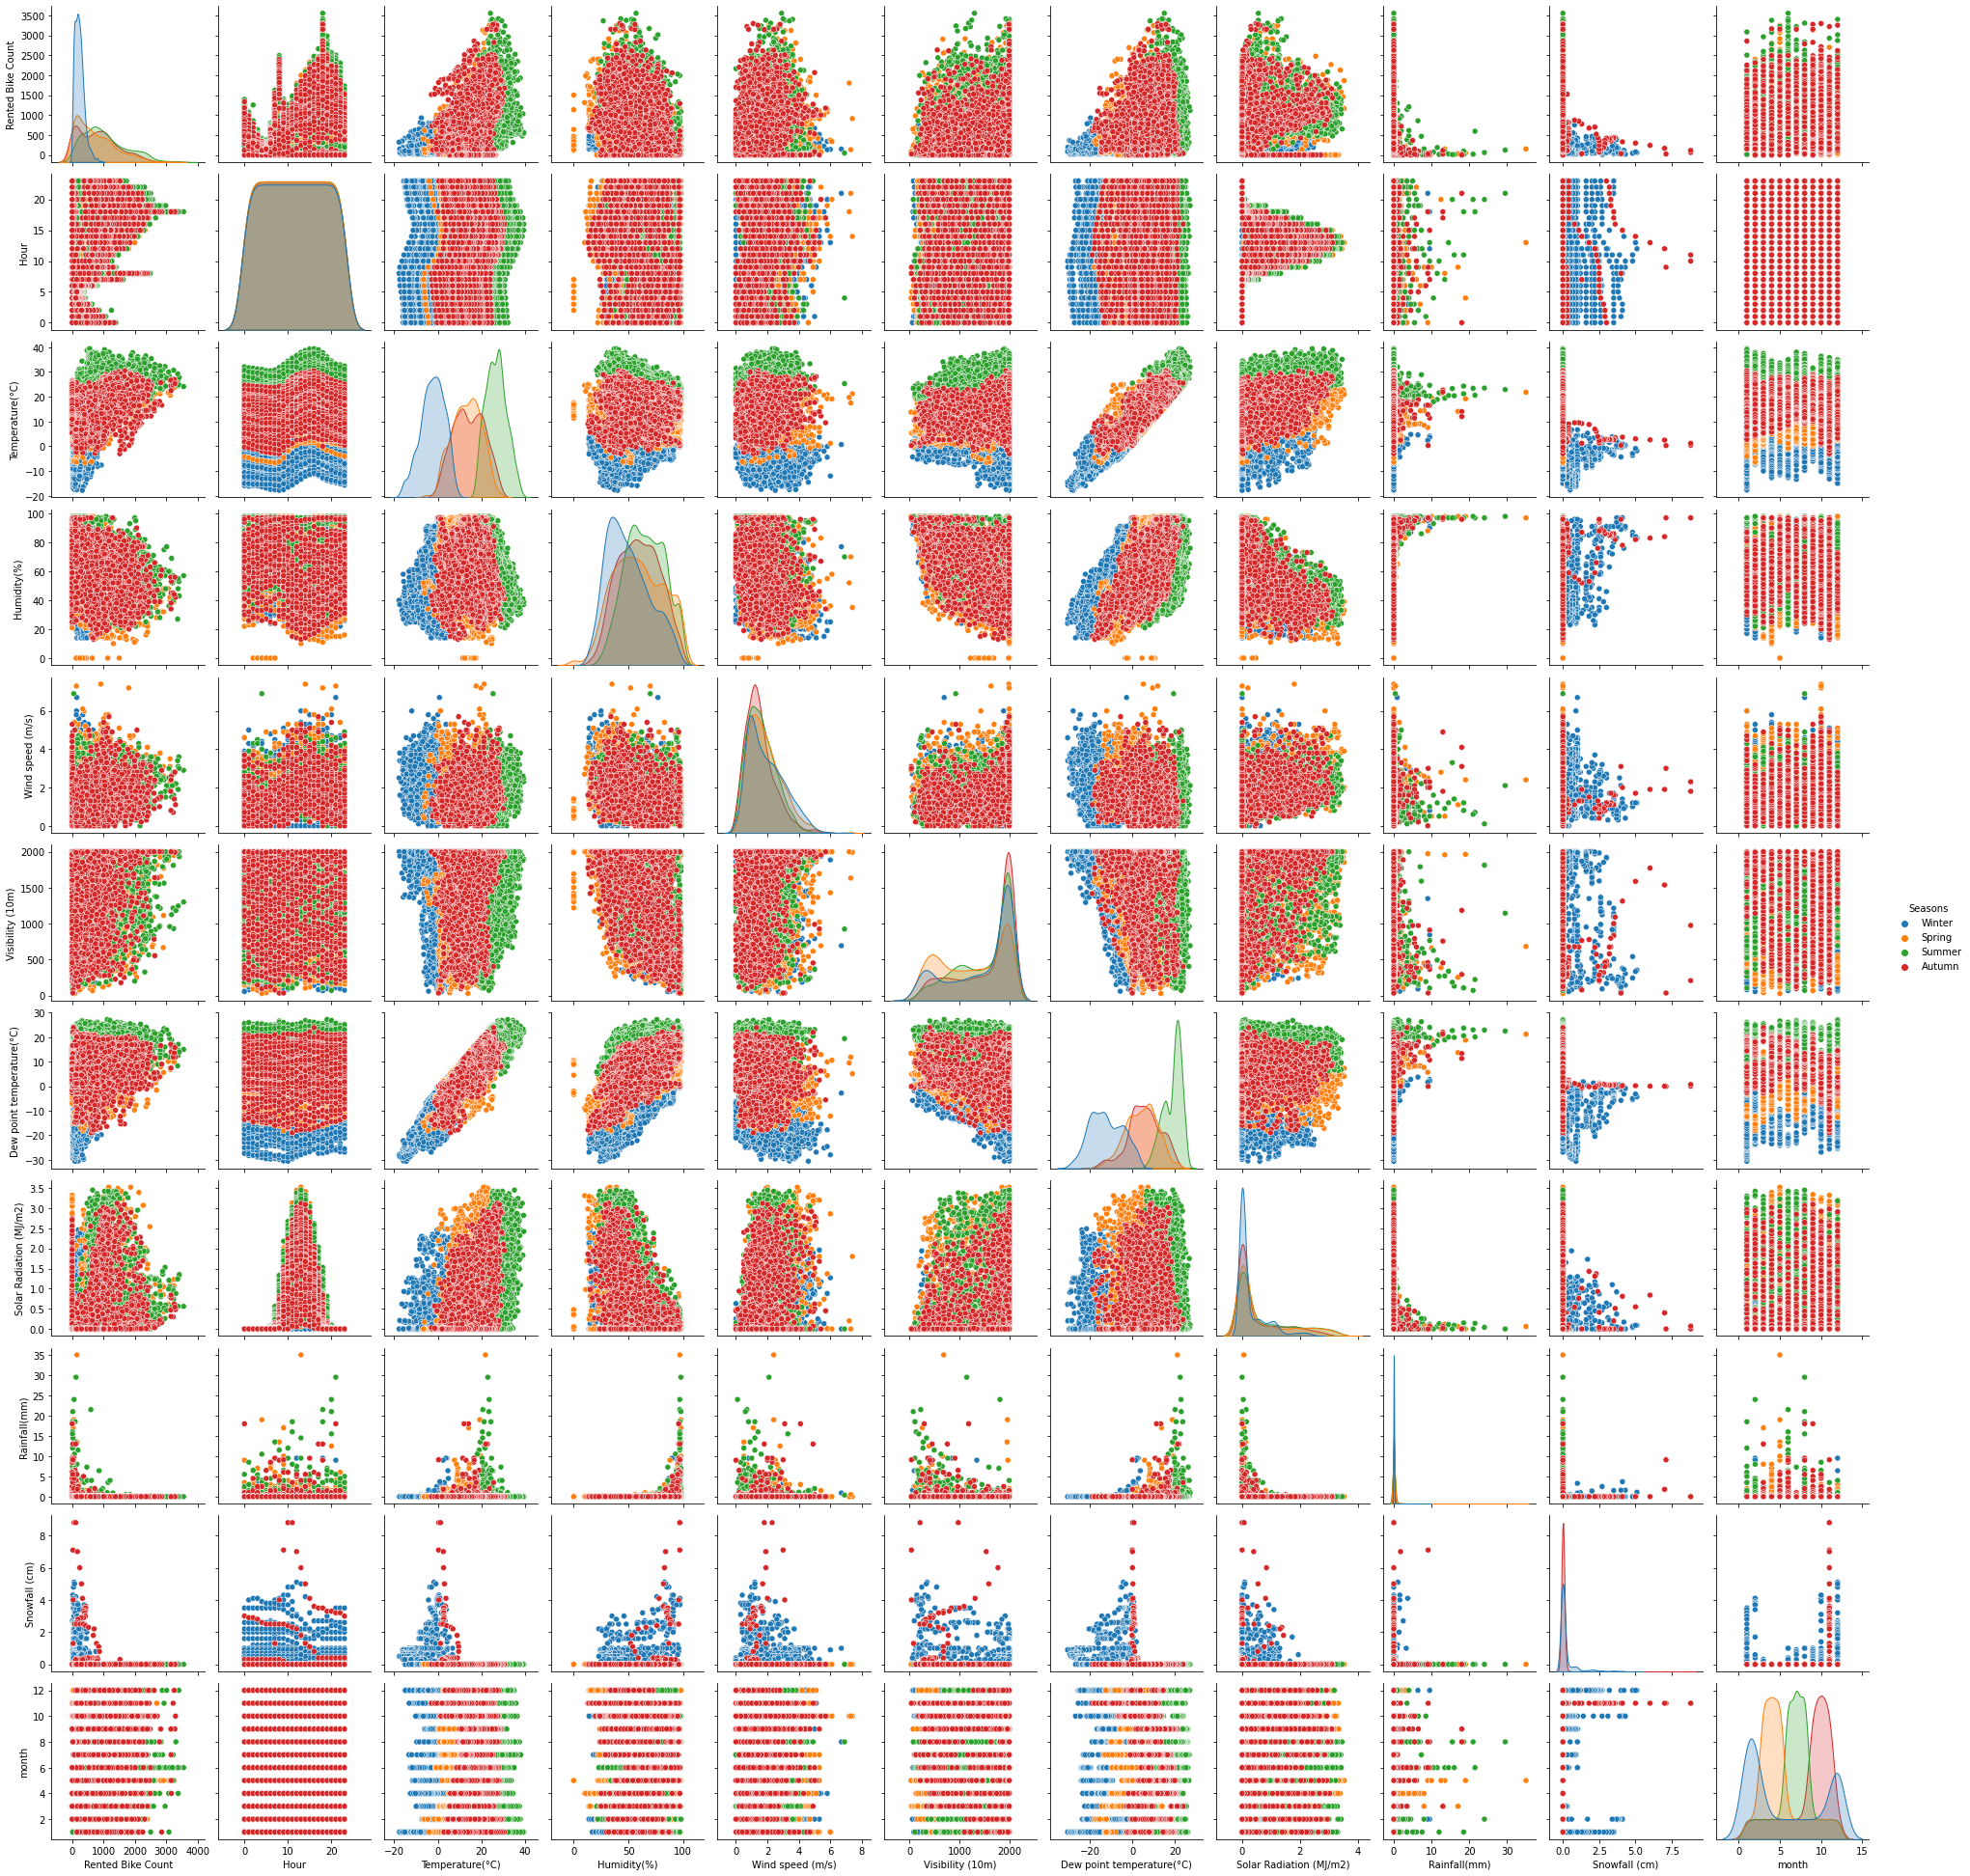

In [49]:
# Pair Plot visualization code
sns.pairplot(dataset, hue ='Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro

DataToTest = dataset['Temperature(°C)']

stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.30f' % (stat, p ))

if p > 0.05:
  print('Normal Distribution')
else:
  print('Not a Normal Distribution')

stat=0.98, p=0.000000000000000000000000000000
Not a Normal Distribution


##### Which statistical test have you done to obtain P-Value?

Answer Here. Normality test using Shapiro

##### Why did you choose the specific statistical test?

Answer Here.: to know the distribution is normal or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

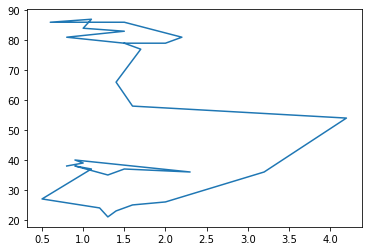

In [51]:
Firstsample = dataset[1:30]['Wind speed (m/s)']
Secondsample = dataset[1:30]['Humidity(%)']

plt.plot(Firstsample, Secondsample)
plt.show()

In [52]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

stat, p = spearmanr(Firstsample, Secondsample)
print('stat=%.3f, p=%5f' % (stat, p ))

if p > 0.05:
  print('independent sample')
else:
  print('dependent sample')

stat=-0.065, p=0.739267
independent sample


In [53]:
from scipy.stats import pearsonr

stat, p = pearsonr(Firstsample, Secondsample)
print('stat=%.3f, p=%5f' % (stat, p ))

if p > 0.05:
  print('independent sample')
else:
  print('dependent sample')

stat=-0.018, p=0.924891
independent sample


##### Which statistical test have you done to obtain P-Value?

Answer Here.:- Correlation Test : Pearson and Spearman's Rank correlation.

##### Why did you choose the specific statistical test?

Answer Here.:- to seen the wind speed and humidity is dependent or independent.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [54]:
# Assumption independent observations size in each box of contingency table > 25
contingency_data = pd.crosstab(dataset['Holiday'],dataset['Functioning Day'], margins=False)

contingency_data

Functioning Day   No   Yes
Holiday                   
Holiday           24   408
No Holiday       271  8057

In [55]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p ))

if p > 0.05:
  print('independent categories')
else:
  print('dependent categories')


stat=5.996, p=0.014
dependent categories


##### Which statistical test have you done to obtain P-Value?

Answer Here.:- chi2_contingency test

##### Why did you choose the specific statistical test?

Answer Here.: - To find out the dependent columns

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

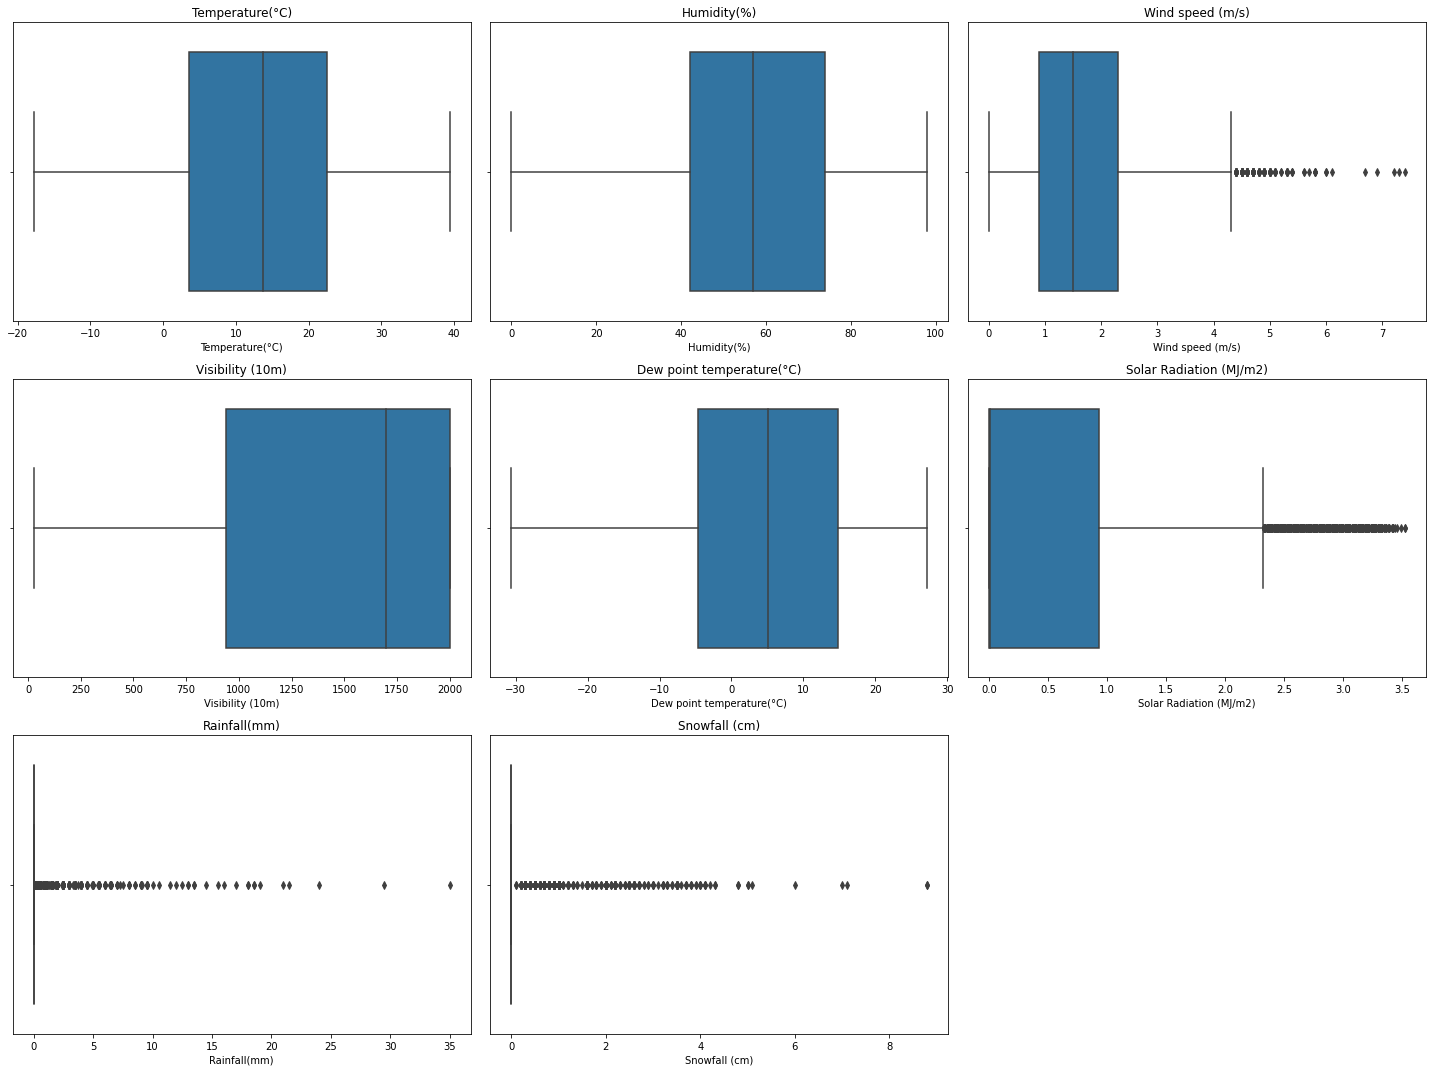

In [56]:
# Handling Outliers & Outlier treatments
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns[1:]:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(dataset[i])
  plt.title(i)
  plt.tight_layout()

In [57]:
numeric_features.columns[1:]

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [58]:
#Creating a list of columns that contains outliers
outlier_cols = ['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)']
outlier_cols

['Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [59]:
# finding the inter-quartile range 

Q1 = dataset[outlier_cols].quantile(0.25)
Q3 = dataset[outlier_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Wind speed (m/s)           1.40
Solar Radiation (MJ/m2)    0.93
Rainfall(mm)               0.00
Snowfall (cm)              0.00
dtype: float64


In [60]:
# listing features to remove outliers

features = list(dataset.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','week']
new_features = [x for x in features if x not in list_0]

In [61]:
# removing outliers

dataset[outlier_cols] = dataset[outlier_cols][~((dataset[outlier_cols] < (Q1 - 1.5 * IQR)) |(dataset[outlier_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

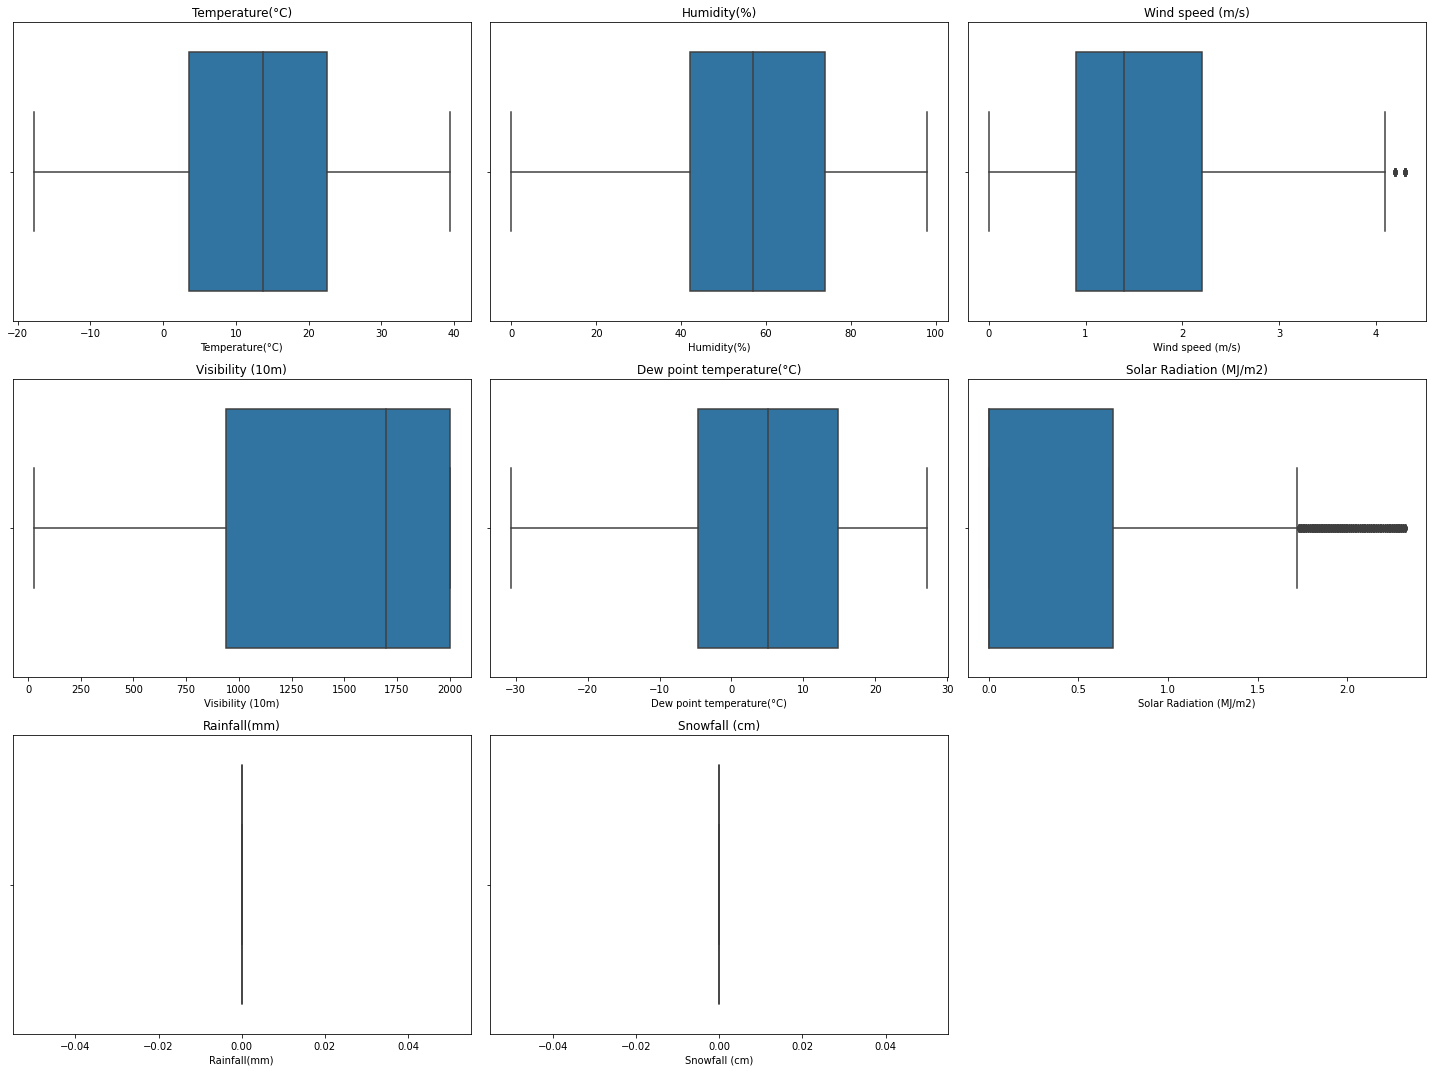

In [62]:
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns[1:]:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(dataset[i])
  plt.title(i)
  plt.tight_layout()
  

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           7078 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    7078 non-null   float64
 8   Rainfall(mm)               7078 non-null   float64
 9   Snowfall (cm)              7078 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here :- I use inter-quartile range method to remove the outlier. The interquartile range is the best measure of variability for skewed distributions or data sets with outliers. Because it's based on values that come from the middle half of the distribution, it's unlikely to be influenced by outliers.

### 2. Handling Missing Values

In [64]:
# Handling Missing Values & Missing Value Imputation
dataset['Wind speed (m/s)'] = dataset['Wind speed (m/s)'].fillna(dataset['Wind speed (m/s)'].median())

dataset['Solar Radiation (MJ/m2)'] = dataset['Solar Radiation (MJ/m2)'].fillna(dataset['Solar Radiation (MJ/m2)'].median())

dataset['Rainfall(mm)'] = dataset['Rainfall(mm)'].fillna(dataset['Rainfall(mm)'].median())

dataset['Snowfall (cm)'] = dataset['Snowfall (cm)'].fillna(dataset['Snowfall (cm)'].median())


In [65]:
dataset.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
week                         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here :- fill all the missing values with fillna method by the median value of that column.

we does not fill the column with mean value because one big oulier impact the mean value a lot and median value does not have any impact by the big outlier. 

### 3. Categorical Encoding

In [66]:
# Encode your categorical columns
#Encoding for Seasons column
dataset['Winter'] = np.where(dataset['Seasons']=='Winter', 1, 0)
dataset['Spring'] = np.where(dataset['Seasons']=='Spring', 1, 0)
dataset['Summer'] = np.where(dataset['Seasons']=='Summer', 1, 0)
dataset['Autumn'] = np.where(dataset['Seasons']=='Autumn', 1, 0)

#Removing seasons column since we dont require it now.
dataset.drop(columns=['Seasons'],axis=1,inplace=True)

In [67]:
#Encoding for Holiday column
dataset['Holiday'] = np.where(dataset['Holiday']=='Holiday',1,0)

In [68]:
#Encoding for Functioning day
dataset['Functioning Day'] = np.where(dataset['Functioning Day']=='Yes',1,0)

In [69]:
#Encoding for week
dataset['week'] = np.where(dataset['week']=='weekday',1,0)

In [70]:
dataset.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day month  week  Winter  \
0           0.0            0.0        0                1     1     1       1   
1           0.0            0.0        0                1     1     1       1   
2           0.0            0.0        0                1     1     1       1   
3           0.0            0.0        0                1     1     1       1   
4           0.0            0.0        0                1     1     1       1   

   Spring  Summer  Autumn  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here :-Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as Feature Encoding.we will convert all the values by np.where method.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [71]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

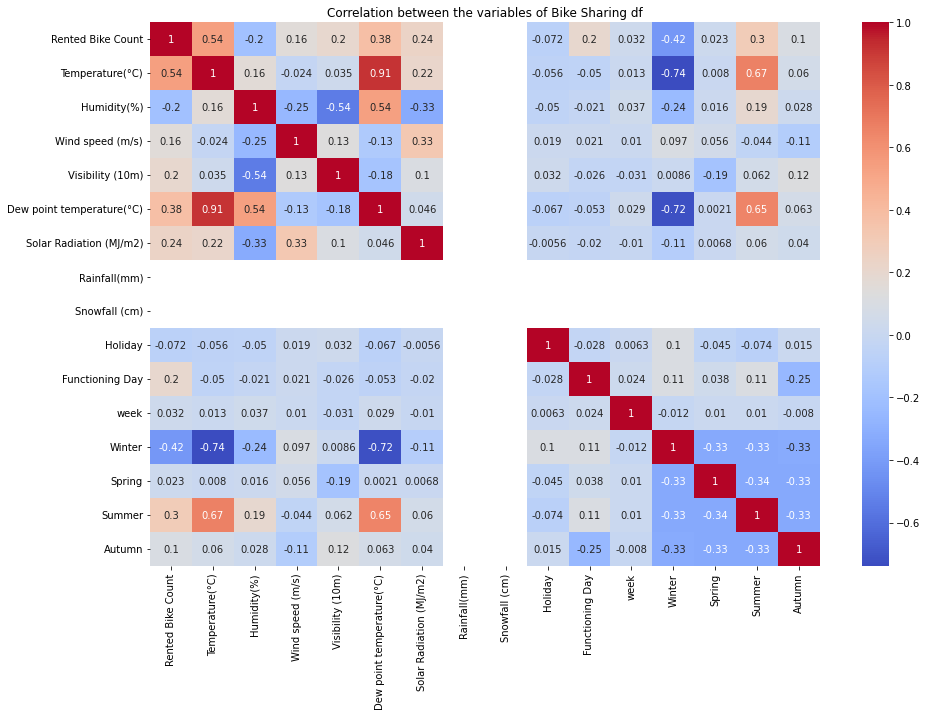

In [72]:
# Select your features wisely to avoid overfitting
#Plotting correlation matrix using sns.heatmap
corr_matrix = dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

The Dew point temperature column is highly correlated to the Temperature column and therefore we can remove it and it most likely won't affect our model building much, so we will drop the dew point temperature column.

In [73]:
#Dropping unnecessary column
dataset.drop(columns={'Dew point temperature(°C)'},axis=1,inplace=True)

In [74]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'month',
       'week', 'Winter', 'Spring', 'Summer', 'Autumn'],
      dtype='object')

###Removing Multicollinearity

Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

Note: I will check the multicollinearity of our dataset by using the variance inflation factor(VIF). Accepted VIF is less than 10.

In [75]:
#Creating a list of independent columns
independent_cols =  dataset.describe().columns

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [77]:
#Calculating the VIF for independent columns
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

Columns        VIF
0           Temperature(°C)   4.272381
1               Humidity(%)   1.938107
2          Wind speed (m/s)   1.183999
3          Visibility (10m)   1.631018
4   Solar Radiation (MJ/m2)   1.359597
5              Rainfall(mm)        NaN
6             Snowfall (cm)        NaN
7                   Holiday   1.021888
8           Functioning Day   1.078937
9                      week   1.002773
10                   Winter  19.586186
11                   Spring  22.623979
12                   Summer  30.844181
13                   Autumn  22.903583

We can see that the seasons encoding have very high VIF therefore we will eliminate one of the columns. We will drop winter because it has the lowest bikes rented. The columns week, Rainfall and Snowfall have no VIF at all so we will drop them too.

In [78]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count','Winter','Rainfall(mm)','Snowfall (cm)','week']]])

Columns        VIF
0          Temperature(°C)   9.232664
1              Humidity(%)  10.623510
2         Wind speed (m/s)   5.007453
3         Visibility (10m)   7.255770
4  Solar Radiation (MJ/m2)   1.732891
5                  Holiday   1.071352
6          Functioning Day  17.638020
7                   Spring   3.937504
8                   Summer   8.995430
9                   Autumn   4.427831

We can see that Functioning Day has a VIF>10 therefore we will remove it.

In [79]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count','Winter','Rainfall(mm)','Snowfall (cm)','week','Functioning Day']]])

Columns       VIF
0          Temperature(°C)  9.194409
1              Humidity(%)  5.595640
2         Wind speed (m/s)  4.765329
3         Visibility (10m)  4.725375
4  Solar Radiation (MJ/m2)  1.694174
5                  Holiday  1.070824
6                   Spring  3.903689
7                   Summer  8.990272
8                   Autumn  4.405178

Now we don't have any variable with VIF>10 we can move ahead.

##### What all feature selection methods have you used  and why?

Answer Here :- Variance inflation factor measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables. Variance inflation factors allow a quick measure of how much a variable is contributing to the standard error in the regression.

##### Which all features you found important and why?

Answer Here :- 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
        'Holiday', 'Spring', 'Summer', 'Autumn'

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Text(0.5, 1.0, 'Square root')

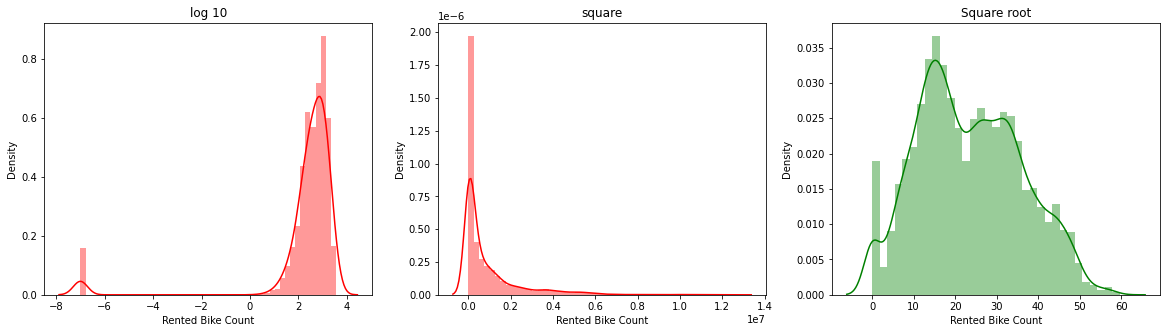

In [80]:
# Transform Your data
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(dataset['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((dataset['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(dataset['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

### 8. Data Splitting

In [81]:
#Creating the dataset for independent and dependent variables
X =dataset.drop(columns={'Rented Bike Count','Winter','Rainfall(mm)','Snowfall (cm)','week','Functioning Day','Hour','month'},axis=1)
Y = dataset['Rented Bike Count']

In [82]:
X.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Holiday', 'Spring',
       'Summer', 'Autumn'],
      dtype='object')

In [83]:
Y = np.sqrt(Y)

##### Which method have you used to scale you data and why?

In [84]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [85]:
#Shape of the train set of the independent values
X_train.shape

(6570, 9)

In [86]:
#Shape of the test set of the independent values
X_test.shape

(2190, 9)

##### What data splitting ratio have you used and why? 

Answer Here :- Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model. Data splitting is an important aspect of data science, particularly for creating models based on data.

### 6. Data Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Two ways of feature scaling:

Min max normalization

Standardisation

In this project I'm going to use the standardisation method with the help of the StandardScaler() function.

In [87]:
# Scaling your data
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [88]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [89]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[-0.74954694,  1.22697808, -0.20539816, ..., -0.5807482 ,
        -0.57582707,  1.72819284],
       [ 0.93615918, -0.54181953, -0.20539816, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [-1.65916064, -1.22968527,  0.50447345, ..., -0.5807482 ,
        -0.57582707, -0.57863913],
       ...,
       [ 1.06133538, -0.05048686, -0.20539816, ..., -0.5807482 ,
         1.73663249, -0.57863913],
       [-0.37401835,  0.04777967,  0.62278539, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [-0.47415931,  1.22697808,  2.04252861, ...,  1.72191666,
        -0.57582707, -0.57863913]])

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Hard rules are hard to state, other than “after you have tried it, did it improve matters”, which isn’t always the most useful guidance.

Instead, looking at why we might want to do this we can get a bit of insight. Admittedly some of the following might blur together a bit at the edges but the aim is to give a flavour.

Our data are too big. 4 million rows. 50,000 columns… is there a lot of redundancy there? Building a model on this could be very expensive. Even relatively simple dimension reduction techniques like PCA can capture almost all of the information in a fraction of the memory if there are strong relationships (that can be linearly approximated) in the data.

We are over-fitting. If you build a model with tens of thousands of degrees of freedom but don’t have a lot of examples you can easily overfit. Dimension reduction is one way of handling this, though often not the the best

We want to bring in external data. OK, this is a bit different but worth a note. In applications like word2vec we want to build a classifier using an embedding. We may want to classify some text into different categories but with only a limited number of examples. The complexity of free text is vast but a low dimension embedding is much smaller and will not overfit so badly in a classifier. Building a low dimensional embedding on external text, applying it to the text to be classified then building a classifier is using dimension reduction to bring in external data.

We suffer from the curse of dimesnionality. Consider something like a nearest neighbour search. As the number of dimensions gets large we see some unwanted behaviour, especially if we are looking at things like euclidean distances. Projecting your data to a lower dimensional space for nearest neighbour, clustering or outlier detection can be both more robust and more meaningful.

Some tools are all about this. Collaborative filtering through matrix factorisation is an example. Can we approximately describe behaviour as a linear combination of a smaller number of preferences/behaviours?Answer Here.

In [90]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [91]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with a regression problem, therefore we will be using regression models. Some popular examples are Linear Regression and polynomial regression.

In this project we will be include the following models:

1) Linear regression.

2) Ridge regression (Linear regression with L2 regularization).

3) Lasso regression (Linear regression with L1 regularization).

4) Random forest regression.

### ML Model - 1 :- Linear Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
# ML Model - 1 Implementation
regression = LinearRegression()

# Fit the Algorithm
regression.fit(X_train,Y_train)

# Predict on the model
regression.score(X_train,Y_train)

0.4200710468761607

In [93]:
#Checking the coefficient values of the linear regression model
regression.coef_

array([ 5.81912647, -3.94881362,  1.16172027, -0.0360878 , -0.010966  ,
       -0.87755174,  1.78176757,  2.10270929,  2.25750333])

In [94]:
regression.intercept_

23.534127039443128

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
#predicting 
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = regression.predict(X_train)
Y_test_pred_lr = regression.predict(X_test)

In [96]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(15,10))
   plt.title("The comparison of actual values and predictions obtained by "+model) 
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

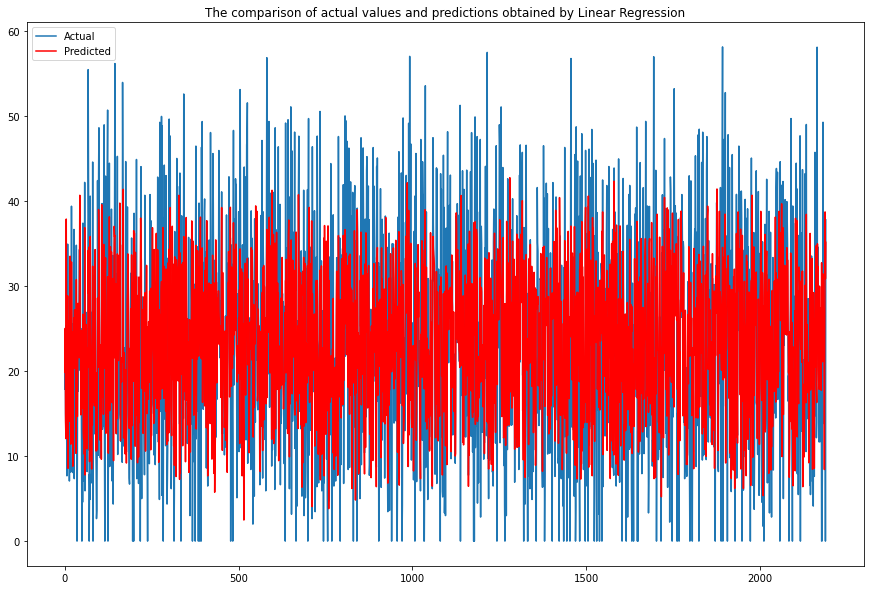

In [97]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr,'Linear Regression')

In [98]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)
  
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)
  
  r2_test = r2_score(Y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)
  
  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [99]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 95.89374649005813
RMSE : 9.79253524323799
R2 : 0.3929484722102591
Adjusted R2 : 0.39044229617809956


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here:-

The evaluation metrics for Linear Regression are given as:

MSE : 95.89374649005813

RMSE : 9.79253524323799

R2 : 0.3929484722102591

Adjusted R2 : 0.39044229617809956

### ML Model - 2 :- Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,Y_train)
L1.score(X_train,Y_train)

0.42007081654497536

In [101]:
L1_pred = L1.predict(X_test)
eval_metrics(L1_pred,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 95.89273245271238
RMSE : 9.792483467063521
R2 : 0.39295489153312946
Adjusted R2 : 0.3904487420027616


In [102]:
L1.coef_

array([ 5.82440437, -3.94353029,  1.1597576 , -0.0320854 , -0.00814595,
       -0.87707717,  1.775041  ,  2.0917251 ,  2.24935211])

In [103]:
L1.intercept_

23.534127039443128

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [105]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -89.62204157059848


In [106]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_regressor=Lasso(alpha=0.01).fit(X_train,Y_train)

In [107]:
#Predicting values of the independent variable on the test set
lasso_pred = lasso_regressor.predict(X_test)
#Calculating the evaluation metrics for Lasso Regression
eval_metrics(lasso_pred,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 95.88881879245086
RMSE : 9.792283635212517
R2 : 0.39297966680292507
Adjusted R2 : 0.3904736195557811


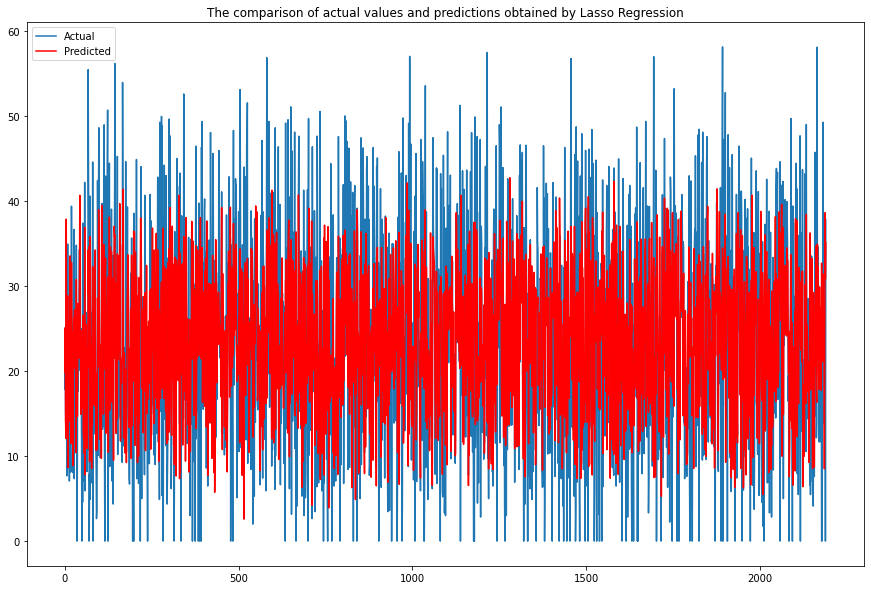

In [108]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(lasso_pred,'Lasso Regression')

##### Which hyperparameter optimization technique have you used and why?

Answer Here:-  GridSearchCV hyperparameter optimization technique

Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here :-  No,There is no improvement with previous and updated Evaluation metric Score Chart.


The evaluation metrics for Lasso Regression are given as:

MSE : 95.88881879245086

RMSE : 9.792283635212517

R2 : 0.39297966680292507

Adjusted R2 : 0.3904736195557811


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here:- Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

### ML Model - 3 :- Ridge Regresson

In [109]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [110]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [111]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_regressor = GridSearchCV(L2, parameters, scoring='neg_mean_squared_error', cv=5)
# Fit the Algorithm
L2_regressor.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [112]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
print("The best fit alpha value is found out to be :" ,L2_regressor.best_params_)
print("\nUsing ",L2_regressor.best_params_, " the negative mean squared error is: ", L2_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -89.62692574594709


In [113]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_regressor=Ridge(alpha=20).fit(X_train,Y_train)

In [114]:
# Predict on the model
L2_pred = L2_regressor.predict(X_test)
eval_metrics(L2_pred,'Ridge Regressor')

The evaluation metrics for Ridge Regressor are given as:
MSE : 95.89056422351416
RMSE : 9.792372757586088
R2 : 0.392968617421371
Adjusted R2 : 0.3904625245575142


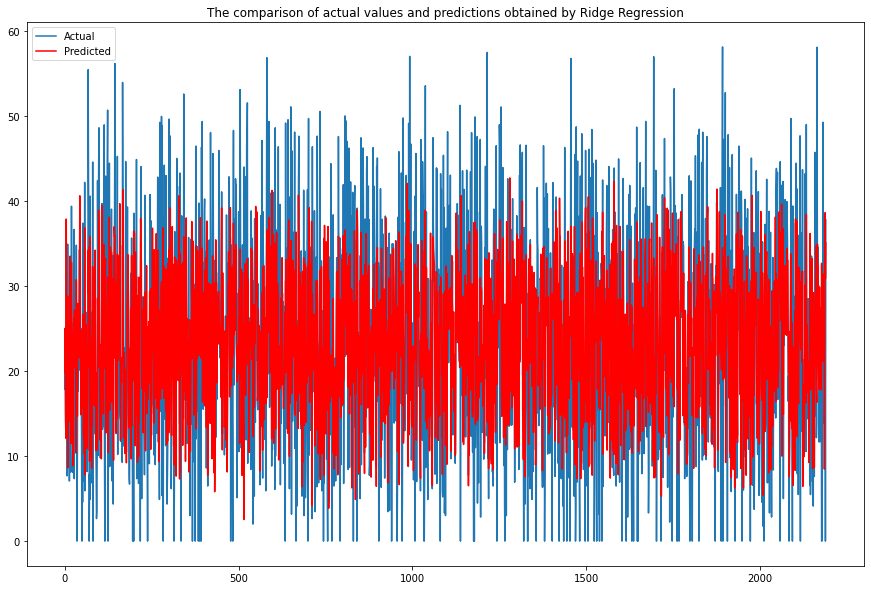

In [115]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(L2_pred,'Ridge Regression')

##### Which hyperparameter optimization technique have you used and why?

Answer Here:- GridSearchCV hyperparameter optimization technique

Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here:-  
The evaluation metrics for Ridge Regressor are given as:

MSE : 95.89056422351416

RMSE : 9.792372757586088

R2 : 0.392968617421371

Adjusted R2 : 0.3904625245575142

# Random Forest Regression:

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [116]:
#Creating a Random Forest Regression model using GridSearchCV
rand_forest = RandomForestRegressor()


parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

rf_model_grid = GridSearchCV(rand_forest,parameters,scoring='r2',cv=5)
rf_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [117]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 17}

Using {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 17} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.6034621886956044


In [118]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,Y_train)

In [119]:
#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model.predict(X_test)

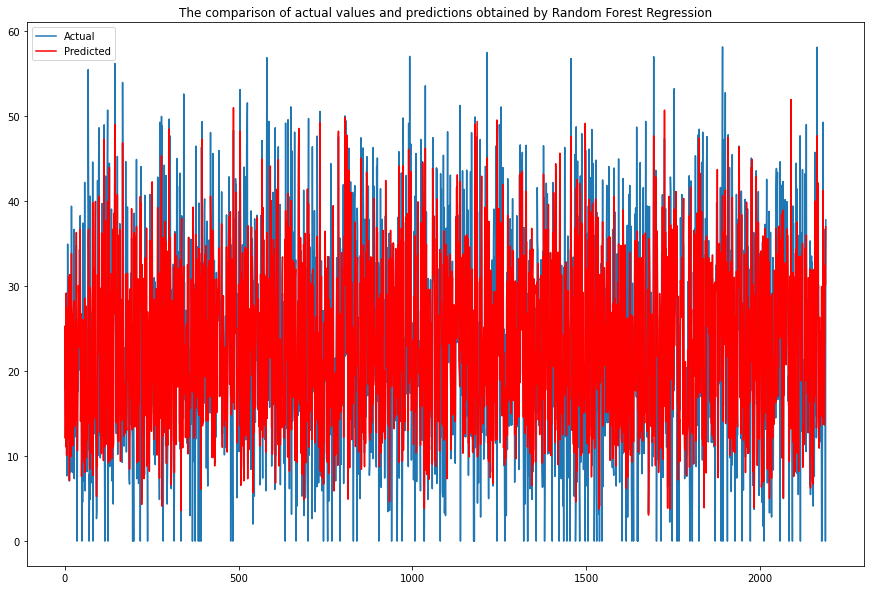

In [120]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression
plot_comparison(Y_test_pred_rf,'Random Forest Regression')

In [121]:
#Calculating the evaluation metrics for Random Forest Regression
eval_metrics(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 70.22150088869842
RMSE : 8.379827020213389
R2 : 0.555465596470438
Adjusted R2 : 0.5536303626943986


A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

As we can see the quality of model prediction has drastically improved.

The evaluation metrics for Random Forest Regression are given as:

MSE : 67.60289211889297

RMSE : 8.222097793075255

R2 : 0.5720425945811419

Adjusted R2 : 0.5702757979532659

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here :- Random Forest Regression Evaluation metrics gives a positive business impact.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

As we can see the quality of model prediction has drastically improved.



The evaluation metrics for Random Forest Regression are given as:

MSE : 67.60289211889297

RMSE : 8.222097793075255

R2 : 0.5720425945811419

Adjusted R2 : 0.5702757979532659

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here :-  Random Forest Regression Model

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

As we can see the quality of model prediction has drastically improved.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

EDA insights:

*   Most number of bikes are rented in the Summer season and the lowest in the winter season.
*   Over 96% of the bikes are rented on days that are considered as No Holiday.

*   Most number of bikes are rented in the temperature range of 15 degrees to 30 degrees.
*   Most number of bikes are rented when there is no snowfall or rainfall.

*   Majority of the bikes are rented for a humidity percentage range of 30 to 70.
*   The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.


*   In the Functioning Day column, If there is no Functioning Day then there is no demand
*   the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays.



*   Most of the bike rentals have been made when there is high visibility.


*   We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.




Results from ML models:

*   Random Forest Regression is the best performing model with an r2 score of   0.5720
*   Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.3718

*   Actual vs Prediction visualisation is done for all the 4 models.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***